# 第4回講義 宿題

## 課題. MNISTデータセットを多層パーセプトロン(MLP)で学習せよ

### 注意
- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください\
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- MLPの実装にTensorflowなどのライブラリを使わないでください

### ヒント
- 出力yはone-of-k表現
- 最終層の活性化関数はソフトマックス関数, 誤差関数は多クラス交差エントロピー
- 最終層のデルタは教科書参照

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def deriv_softmax(x):
    return softmax(x)*(1-softmax(x))

In [27]:
def test(x):

    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)

    u3 = np.matmul(z2,W3) + b3
    z3 = softmax(u3)
    y =[]
    for one in z3:
        y.append(np.argmax(one))
    return y

In [3]:
def train(x, t, eps=0.2):
    global W1, b1, W2, b2,W3,b3  # to access variables that defined outside of this function.

    y_tmp = np.zeros(10).reshape(1, 10)
    y_tmp[0,t] = 1.0
    train_y=y_tmp
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)

    u3 = np.matmul(z2,W3) + b3
    z3 = softmax(u3)

    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z3
    # cost = np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    cost = -np.log(y[0,t])
    
    delta_3 = (y-train_y)
    delta_2 = deriv_sigmoid(u2) * np.matmul(delta_3, W3.T)  # Layer2 delta
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T)  # Layer1 delta

    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps * dW1
    b1 = b1 - eps * db1

    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps * dW2
    b2 = b2 - eps * db2

    # Update Parameters Layer3
    dW3 = np.matmul(z2.T, delta_3)
    db3 = np.matmul(np.ones(len(z2)), delta_3)
    W3 = W3 - eps * dW3
    b3 = b3 - eps * db3

    return cost

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def homework(train_X, train_y, test_X):
    cost_plt =[]
    for epoch in range(30):
    # Online Learning
        cost_arry = []
        for x, y in zip(train_X, train_y):
            x = x.reshape(1,len(x))
            cost = train(x, y)
            cost_arry.append(cost)
            
        cost_plt.append(np.sum(cost_arry))
#         print cost_plt
    plt.plot(cost_plt)
    pred_y = test(test_X)
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、score_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [33]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import time 
import numpy as np

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:100]
    train_y_mini = train_y[:100]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    start = time.time()
    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))
    elapsed_time = time.time() - start
    print ('elapsed_time:', elapsed_time)
#     print ('elapsed_time:{0}'.format(elapsed_time)) + '[sec]'

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    start = time.time()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))
    elapsed_time = time.time() - start
    print ('elapsed_time:', elapsed_time)
#     print ('elapsed_time:{0}'.format(elapsed_time)) + '[sec]'

In [36]:
# Layer1 weights
W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 300)).astype('float32')
b1 = np.zeros(300).astype('float32')

# Layer2 weights
W2 = np.random.uniform(low=-0.08, high=0.08, size=(300, 100)).astype('float32')
b2 = np.zeros(100).astype('float32')

# Layer3 weights
W3 = np.random.uniform(low=-0.08, high=0.08, size=(100, 10)).astype('float32')
b3 = np.zeros(10).astype('float32')

0.697931088519
elapsed_time: 5.0876240730285645


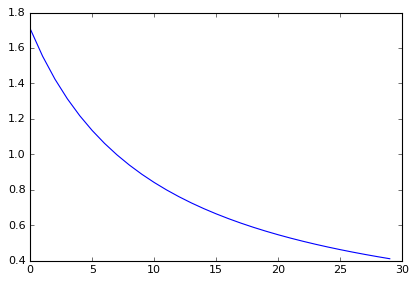

In [38]:
validate_homework()
# score_homework()

0.963230169897
elapsed_time:2382.41376781[sec]


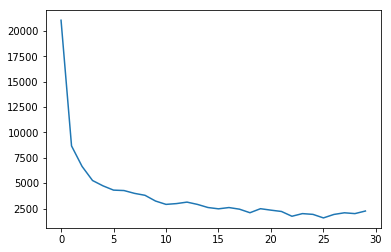

In [7]:
# validate_homework()
score_homework()